패키지

In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from PIL import Image


# ealry stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

호출

horse: 1112
human: 1436


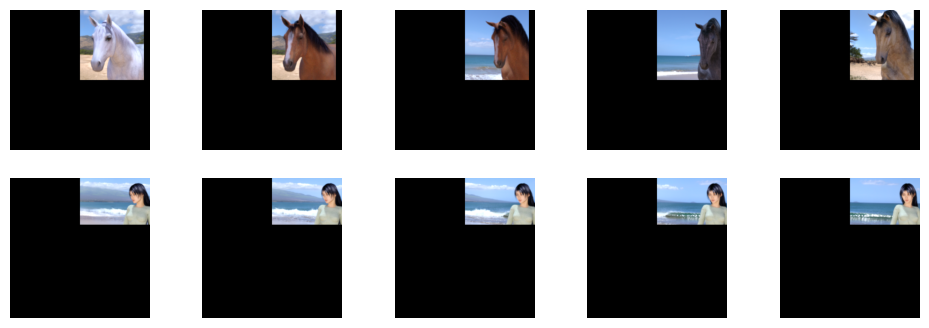

In [2]:
train_horse_dir = "./dataset/train_added/horses"
train_human_dir = "./dataset/train_added/humans"

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

# 학습 데이터 리스트업
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

horse_files = [train_horse_dir + "/" + f for f in train_horse_names]
human_files = [train_human_dir + "/" + f for f in train_human_names]

# 학습 데이터의 개수 확인
print("horse:", len(train_horse_names))
print("human:", len(train_human_names))

# 데이터 미리보기
fig, axes = plt.subplots(2, 5, figsize=(12, 4))
ax = np.reshape(axes, -1)

for i, path in enumerate(horse_files[:5] + human_files[:5]):
    img = plt.imread(path)
    ax[i].axis("off")
    ax[i].imshow(img)

plt.show()

전처리

In [ ]:
# # HOG 기반 말 감지기 설정
# hog = cv2.HOGDescriptor()
# hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
# # 이미지 불러오기
# image = cv2.imread('./dataset/horse01-0.png')
# # 사람 감지
# rects, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(16, 16), scale=1.05)
# # 감지된 사람들을 사각형으로 표시 및 마스킹 처리
# for (x, y, w, h) in rects:
#     # 사람 영역을 흰색 마스크로 처리
#     mask = np.zeros_like(image)
#     mask[y:y+h, x:x+w] = image[y:y+h, x:x+w]
# # 결과 출력
# cv2.imshow("Masked Image", mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

머리

말

정면

In [ ]:
import os

from PIL import Image


input_folder = "./dataset/train/cate/front/"
output_folder = "./dataset/train/head/"

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(
        ".jpg"
    ):  # PNG 또는 JPG 파일만 처리
        # 이미지 불러오기
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # 이미지 크기 얻기
        width, height = image.size

        # 말 머리 부분을 잘라내기 위해 크기 정의 (이미지의 가로 중앙 부분을 사용)
        crop_width = width // 2  # 이미지의 가로 크기의 절반
        left = width - crop_width  # 가로 기준 중앙에서 시작
        right = left + crop_width  # 가로 기준 중앙에서 끝나는 위치
        crop_area = (
            left // 3,
            0,
            right // 1.6,
            height // 2,
        )  # 가로 중앙 부분 전체를 잘라냄

        # 이미지 자르기
        center_image = image.crop(crop_area)

        # 원본 이미지 크기로 검정색 이미지 생성
        black_image = Image.new("RGB", (width, height), color="black")

        # 검정색 이미지에 가로 중앙 부분 붙여넣기
        black_image.paste(center_image, (left, 0))

        # 새 이미지 저장
        output_image_path = os.path.join(output_folder, f"center_{filename}")
        black_image.save(output_image_path)

        print(f"처리된 이미지 저장 경로: {output_image_path}")

오른쪽

In [ ]:
import os

from PIL import Image


input_folder = "./dataset/train/cate/right/"
output_folder = "./dataset/train/right/"

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(
        ".jpg"
    ):  # PNG 또는 JPG 파일만 처리
        # 이미지 불러오기
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # 이미지 크기 얻기
        width, height = image.size

        # 말의 오른쪽 1/4 영역만 자르기 위한 크기 정의
        left = int(width * 3 / 7)  # 이미지의 3/4 지점에서 시작
        crop_area = (left, 0, width, height // 2)  # 오른쪽 1/4만 남기기

        # 이미지 자르기
        right_quarter_image = image.crop(crop_area)

        # 원본 이미지 크기로 검정색 이미지 생성
        black_image = Image.new("RGB", (width, height), color="black")

        # 검정색 이미지에 오른쪽 1/4 영역 붙여넣기
        black_image.paste(right_quarter_image, (left, 0))

        # 새 이미지 저장
        output_image_path = os.path.join(output_folder, f"right_quarter_{filename}")
        black_image.save(output_image_path)

        print(f"처리된 이미지 저장 경로: {output_image_path}")

왼쪽

In [ ]:
import os

from PIL import Image


input_folder = "./dataset/train/cate/left/"
output_folder = "./dataset/train/left/"

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(
        ".jpg"
    ):  # PNG 또는 JPG 파일만 처리
        # 이미지 불러오기
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # 이미지 크기 얻기
        width, height = image.size

        # 왼쪽 1/4 영역만 남기기 위한 크기 정의
        crop_width = int(width * 3 / 7)  # 이미지의 가로 크기의 1/4 부분을 남김
        crop_area = (0, 0, crop_width, height // 2)  # 왼쪽 1/4 영역 설정

        # 이미지 자르기
        left_quarter_image = image.crop(crop_area)

        # 원본 이미지 크기로 검정색 이미지 생성
        black_image = Image.new("RGB", (width, height), color="black")

        # 검정색 이미지에 왼쪽 1/4 영역 붙여넣기
        black_image.paste(left_quarter_image, (0, 0))  # 왼쪽 상단부터 붙이기

        # 새 이미지 저장
        output_image_path = os.path.join(output_folder, f"left_quarter_{filename}")
        black_image.save(output_image_path)

        print(f"처리된 이미지 저장 경로: {output_image_path}")

사람

In [ ]:
input_folder = "./dataset/train/human_head/"
output_folder = "./dataset/train/head_human/"

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(
        ".jpg"
    ):  # PNG 또는 JPG 파일만 처리
        # 이미지 불러오기
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # 이미지 크기 얻기
        width, height = image.size

        # 말 머리 부분을 잘라내기 위해 크기 정의 (이미지의 가로 중앙 부분을 사용)
        crop_width = width // 2  # 이미지의 가로 크기의 절반
        left = width - crop_width  # 가로 기준 중앙에서 시작
        right = left + crop_width  # 가로 기준 중앙에서 끝나는 위치
        crop_area = (
            left // 4,
            0,
            right // 1.4,
            height // 3,
        )  # 가로 중앙 부분 전체를 잘라냄

        # 이미지 자르기
        center_image = image.crop(crop_area)

        # 원본 이미지 크기로 검정색 이미지 생성
        black_image = Image.new("RGB", (width, height), color="black")

        # 검정색 이미지에 가로 중앙 부분 붙여넣기
        black_image.paste(center_image, (left, 0))

        # 새 이미지 저장
        output_image_path = os.path.join(output_folder, f"center_{filename}")
        black_image.save(output_image_path)

        print(f"처리된 이미지 저장 경로: {output_image_path}")

모델 설계

In [3]:
# 모델 설계
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,465 (1.02 MB)

 Trainable params: 266,465 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

손실함수

In [4]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [5]:
# 이미지 값을 0~1 사이로 제한
train_datagen = ImageDataGenerator(rescale=1 / 255)

# train set
train_generator = train_datagen.flow_from_directory(
    "./dataset/train_added/",
    target_size=(300, 300),  # 해상도 조절
    batch_size=128,  # 배치 크기
    class_mode="binary",  # 분류 방법
)

# valid set
valid_generator = train_datagen.flow_from_directory(
    "./dataset/validation/", target_size=(300, 300), batch_size=128, class_mode="binary"
)

# 끝까지 돌리지 않고 과적합이 일어나기 전 미리 멈추는 기능
es = EarlyStopping(
    monitor="loss", patience=3  # loss의 변동에 따라 학습을 더할지 그만할지를 결정
)

checkpoint = ModelCheckpoint(
    filepath="./checkpoint.keras", verbose=2, save_best_only=True, mode="auto"
)

# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    callbacks=[checkpoint, es],  # 위에서 정한 es,checkpoint를 적용하는 법
)

Found 2548 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15


c:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 708ms/step - accuracy: 0.5968 - loss: 0.6624
Epoch 2/15


c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - accuracy: 0.7930 - loss: 0.4627
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.9063 - loss: 0.2574
Epoch 4/15


c:\Users\user\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 684ms/step - accuracy: 0.9194 - loss: 0.2329
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 635ms/step - accuracy: 0.9477 - loss: 0.1576
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9394 - loss: 0.1667
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 681ms/step - accuracy: 0.9626 - loss: 0.1314
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 645ms/step - accuracy: 0.9639 - loss: 0.0984
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.9699 - loss: 0.1023
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 714ms/step - accuracy: 0.9636 - loss: 0.0921
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9713 - loss: 0.1002
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.9799 - loss: 0.0492
Epoch 13/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 696ms/step - accuracy: 0.9718 - loss: 0.0654
Epoch 14/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 646ms/step - accuracy: 0.9897 - loss: 0.0384
Epoch 15/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9787 - loss: 0.0532

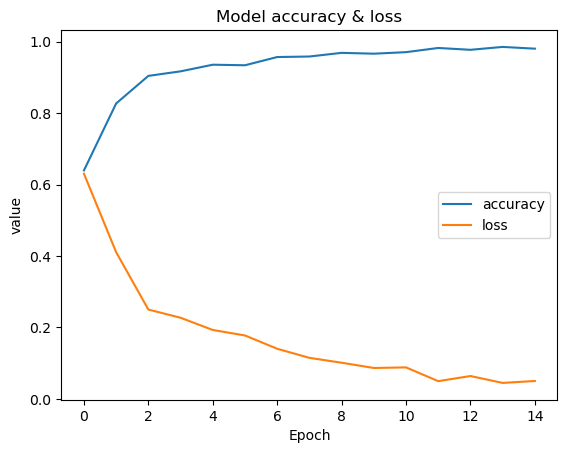

In [6]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model accuracy & loss")
plt.xlabel("Epoch")
plt.ylabel("value")
plt.legend(["accuracy", "loss"], loc="center right")
plt.show()

In [16]:
# 모델 검증
results = model.evaluate(valid_generator)
print("test loss, test acc:", results)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.7760 - loss: 1.1911
test loss, test acc: [1.2255187034606934, 0.76953125]


In [11]:
# 이미지 전처리
dlist = "./dataset/test/"
predict_list = os.listdir(dlist)
print(predict_list)

img = [cv2.imread(dlist + i) for i in predict_list]
img = [cv2.resize(i, (300, 300)) for i in img]
img = np.array(img)
img = img.astype("float32") / 255.0

# 분류
cutoff = 0.5
predictions = model.predict(img)
print(predictions >= cutoff)

['horse1.jpg', 'horse2.webp', 'horse3.jpg', 'human1.jpg', 'human2.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[False]
 [False]
 [ True]
 [False]
 [ True]]
